In [2]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [3]:
os.getcwd()
os.chdir('C:/Users/Samruddhi/Desktop/Edwisor Project 2')
os.getcwd()

'C:\\Users\\Samruddhi\\Desktop\\Edwisor Project 2'

In [4]:
train= pd.read_csv('day.csv')     #reading dataset

In [5]:
train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
train.describe()        #Summary of the dataset

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Exploratory Analysis

(array([  7.,  36.,  90., 104.,  93.,  80.,  93., 101., 103.,  24.]),
 array([0.0591304 , 0.13938406, 0.21963772, 0.29989138, 0.38014504,
        0.4603987 , 0.54065236, 0.62090602, 0.70115968, 0.78141334,
        0.861667  ]),
 <a list of 10 Patch objects>)

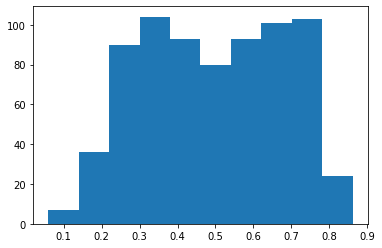

In [7]:
plt.hist(train['temp'])         # visualising data distribution of variables

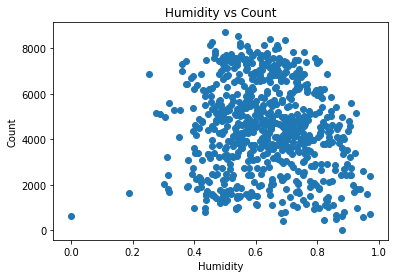

In [8]:
plt.scatter(train['hum'],train['cnt']) # finding relation of independent variables with the target variable using scatter plot
plt.title("Humidity vs Count")
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

# Feature Engineering

In [9]:
train['dteday']= train['dteday'].astype(str)    # converting into charater format

In [10]:
for i in range(len(train)):
    train['dteday'][i] = datetime.strptime(train['dteday'][i],'%d-%m-%Y')  # converting into datetime format

C:\Users\Samruddhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
train['day']= pd.DatetimeIndex(train['dteday']).day  #extracting day from date

In [12]:
train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01 00:00:00,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,2011-01-02 00:00:00,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,2011-01-03 00:00:00,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,2011-01-04 00:00:00,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,2011-01-05 00:00:00,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [13]:
train= train[['instant','dteday','season','yr','mnth','day','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']]

In [14]:
train.head()

,instant,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02 00:00:00,1,0,1,2,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03 00:00:00,1,0,1,3,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04 00:00:00,1,0,1,4,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05 00:00:00,1,0,1,5,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Missing Value Analysis

In [15]:
con_names= ['temp','atemp','hum','windspeed']
cat_names= ['instant','dteday','season','yr','mnth','day','holiday','weekday','workingday','weathersit','casual','registered','cnt']

In [16]:
print(train.isnull().sum())     # No missing values in the dataset

instant       0
dteday        0
season        0
yr            0
mnth          0
day           0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


# Feature Selection

In [17]:
outcome, predictors = dmatrices("cnt ~season +yr +mnth +day +holiday +weekday +workingday +weathersit +temp +hum +windspeed +casual +registered",
                                train, return_type='dataframe')

In [18]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]  #getting VIF values 
vif["features"] = predictors.columns

In [19]:
vif.round(1)

,VIF,features
0,57.3,Intercept
1,4.1,season
2,2.7,yr
3,3.4,mnth
4,1.0,day
5,1.1,holiday
6,1.0,weekday
7,3.1,workingday
8,1.9,weathersit
9,2.5,temp


In [20]:
# Threshold VIF value is 5. We will remove features with VIF value greater than 5

In [21]:
train.drop(['instant','dteday','atemp','casual','registered'], axis = 1, inplace = True) # Removed Features: 'instant','dteday','atemp'

In [22]:
train.head()

,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,2,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,3,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,4,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,5,0,3,1,1,0.226957,0.436957,0.186900,1600


# Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1c4b43b3e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1c4b4450c18>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4b4450160>],
 'medians': [<matplotlib.lines.Line2D at 0x1c4b4450f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c4b445c630>],
 'means': []}

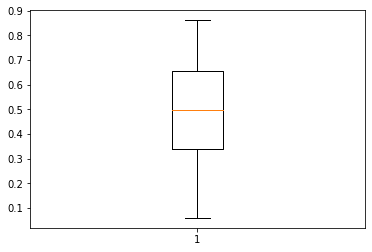

In [23]:
plt.boxplot(train['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c4b46c7f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1c4b4712a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4b4705f28>],
 'medians': [<matplotlib.lines.Line2D at 0x1c4b4712e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c4b471a470>],
 'means': []}

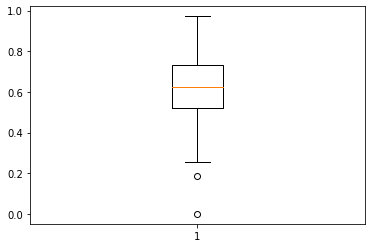

In [24]:
plt.boxplot(train['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c4b472e278>,
 'caps': [<matplotlib.lines.Line2D at 0x1c4b47787f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4b4767cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c4b4778e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c4b4778f60>],
 'means': []}

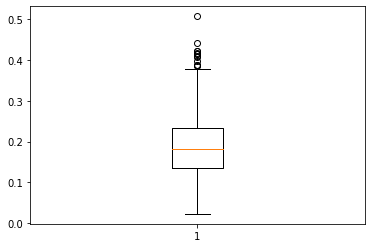

In [25]:
plt.boxplot(train['windspeed'])

In [26]:
col_names= ['hum','windspeed']

In [27]:
for i in col_names:
    q75,q25 = np.percentile(train[i],[75,25])     #removing outliers using boxplot
    iqr= q75 - q25      
    mini= q25 - (iqr*1.5)
    maxi= q75 + (iqr*1.5)
    train.loc[train[i]< mini,i]=np.nan
    train.loc[train[i]> maxi,i]=np.nan
    train= train.dropna()

In [28]:
train.describe()

,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,717.00000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,2.51325,0.499303,6.562064,15.739191,0.029289,2.995816,0.684798,1.396095,0.497365,0.631562,0.186287,4532.843794
std,1.10555,0.500349,3.439113,8.830830,0.168732,2.001741,0.464921,0.543511,0.183617,0.139222,0.071786,1933.542429
min,1.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.254167,0.022392,22.000000
25%,2.00000,0.000000,4.000000,8.000000,0.000000,1.000000,0.000000,1.000000,0.337500,0.524583,0.134329,3214.000000
50%,3.00000,0.000000,7.000000,16.000000,0.000000,3.000000,1.000000,1.000000,0.505833,0.630833,0.178496,4570.000000
75%,3.00000,1.000000,10.000000,23.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.732917,0.230721,6031.000000
max,4.00000,1.000000,12.000000,31.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.378108,8714.000000


# Model Selection

In [29]:
X= train[['season','yr','mnth','day','holiday','weekday','workingday','weathersit','temp','hum','windspeed']]  #independent variables
Y= train[['cnt']]  #target variable
kfold= KFold(n_splits=3, random_state=7)

# Linear Regression

In [30]:
LR= LinearRegression()

In [31]:
r2= cross_val_score(LR,X,Y,cv=kfold,scoring='r2').mean()
mae= cross_val_score(LR,X,Y,cv=kfold,scoring='neg_mean_absolute_error').mean()
mse= cross_val_score(LR,X,Y,cv=kfold,scoring='neg_mean_squared_error').mean()
rmse= math.sqrt(-mse)

In [32]:
print('Rsquared: ',r2,' MAE: ', -mae,' RMSE: ', rmse)

Rsquared:  0.6043947783644802  MAE:  737.3507669287268  RMSE:  953.4899102698212


# Decision Tree

In [33]:
DT= DecisionTreeRegressor()

In [34]:
r2= cross_val_score(DT,X,Y,cv=kfold,scoring='r2').mean()
mae= cross_val_score(DT,X,Y,cv=kfold,scoring='neg_mean_absolute_error').mean()
mse= cross_val_score(DT,X,Y,cv=kfold,scoring='neg_mean_squared_error').mean()
rmse= math.sqrt(-mse)

In [35]:
print('Rsquared: ',r2,' MAE: ',-mae,' RMSE: ',rmse)

Rsquared:  0.06365585025055993  MAE:  1127.8716875871687  RMSE:  1435.3068041489466


# KNN Algorithm

In [36]:
KNN= KNeighborsRegressor()

In [37]:
r2= cross_val_score(KNN,X,Y,cv=kfold,scoring='r2').mean()
mae= cross_val_score(KNN,X,Y,cv=kfold,scoring='neg_mean_absolute_error').mean()
mse= cross_val_score(KNN,X,Y,cv=kfold,scoring='neg_mean_squared_error').mean()
rmse= math.sqrt(-mse)

In [38]:
print('Rsquared: ',r2,' MAE: ',-mae,' RMSE: ',rmse)

Rsquared:  -1.5704326384875433  MAE:  2190.1048814504884  RMSE:  2406.8620865115536


# Random Forest

In [39]:
RF= RandomForestRegressor(n_estimators=1000)

In [40]:
r2= cross_val_score(RF,X,Y,cv=kfold,scoring='r2').mean()
mae= cross_val_score(RF,X,Y,cv=kfold,scoring='neg_mean_absolute_error').mean()
mse= cross_val_score(RF,X,Y,cv=kfold,scoring='neg_mean_squared_error').mean()
rmse= math.sqrt(-mse)

C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A co

In [41]:
print('Rsquared: ',r2,' MAE: ',-mae,' RMSE: ',rmse)

Rsquared:  0.2624898210924091  MAE:  993.9169665271966  RMSE:  1267.4578488749264


In [42]:
#  Random Forest algorithm performs better among other algorithms for this dataset.

# Model Development

In [43]:
# Hyper parameter tuning

In [44]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [1,2,3,4,5,6,7,8,9,10]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [45]:
# Using random grid to search for the best hyperparameters
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.5min finished
C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [46]:
rf_random.best_params_               # best parameters for random forest model

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 5,
 'max_depth': 30,
 'bootstrap': False}

In [47]:
# Model Building

In [48]:
X = train.values[:, 0:11]
Y = train.values[:,11]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [49]:
RF = RandomForestRegressor(n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=6, max_depth=40, bootstrap= True )

In [50]:
RF_model= RF.fit(X_train,y_train)

In [51]:
RF_predict= RF_model.predict(X_test)

In [52]:
# Model Performance Evaluation

In [53]:
rsquared= metrics.r2_score(y_test,RF_predict)
MAE= metrics.mean_absolute_error(y_test,RF_predict)
RMSE= math.sqrt(metrics.mean_squared_error(y_test,RF_predict))

In [54]:
print('Rsquared: ',rsquared,' MAE: ',MAE,' RMSE: ',RMSE)

Rsquared:  0.8661350612460574  MAE:  451.16467592592585  RMSE:  681.6373684759204
